In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib widget

Уравнение переноса  
вар 15  
$u_t + с(t,x)u_x=f(t,x)$  
четырехточечная схема  
готовые формулы см. стр. 97   
$u_t+ (1+2tx)\cos(tx)u_x=2\tg(t)e^x$  
$u(0,x)=x=\phi(x)$  
$u(t,0)=2t=\psi(t)$  
$(t,x) \in [0,1] \times [0,1]$  
$t_m=  m\tau, m\in \overline{0,100}$  
$x_n = nh, n \in \overline{0,100}$  
$\tau=0.01,h=0.01$

In [2]:
def c_(t,x):
    return (1.0+2.0*t*x)*np.cos(t*x)
def f_(t,x):
    return 2*np.tan(t)*np.exp(x)
def phi(x):
    return x
def psi(t):
    return 2.0*t

In [3]:
ta  = 0.0
tb = 1.0
xa = 0.0
xb = 1.0
tau = 0.01
h = 0.01
M = int((tb-ta)/tau)+1
N = int((xb-xa)/h)+1
t = np.linspace(ta,tb,M)
x = np.linspace(xa,xb,N)

In [4]:
y = np.zeros(shape=(M,N))
# НУ 
for n in range(N):
    y[0][n] = phi(x[n])
# ГУ
for m in range(M):
    y[m][0] = psi(t[m])

In [5]:
for m in range(M-1):
    for n in range(N-1):
        c = c_((m+1.0/2.0)*tau, (n+1.0/2.0)*h)
        f = f_((m+1.0/2.0)*tau, (n+1.0/2.0)*h)
        y[m+1][n+1] = 1.0/(1.0/(2*tau)+1.0/(2*h)*c)*( f-1.0/(2*tau)*(y[m+1][n]-y[m][n]-y[m][n+1]) - 1.0/(2.0*h)*c*(y[m][n+1]-y[m+1][n]-y[m][n]))

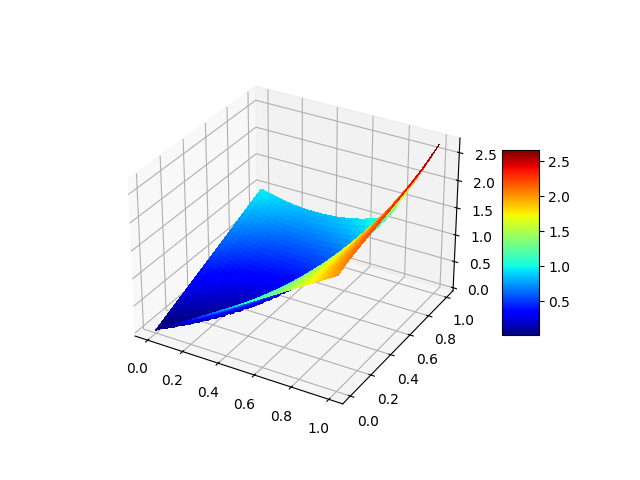

In [6]:
X, Y = np.meshgrid(t, x,indexing='ij')
Z = y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()